In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
em_data = pd.read_csv('/content/Dataset01-Employee_Attrition.csv')

In [3]:
em_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
em_data.shape

(14999, 10)

In [10]:
em_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
em_data.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [14]:
em_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [15]:
em_data[em_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


##Dropping Duplicate Records

In [16]:
em_data1 = em_data.drop_duplicates()

In [19]:
em_data1.shape

(11991, 10)

In [20]:
em_data1.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


##Data Visulisation and exploration


In [21]:
em_data1['left'].value_counts()

,count
left,
0,10000
1,1991


<Axes: xlabel='left'>

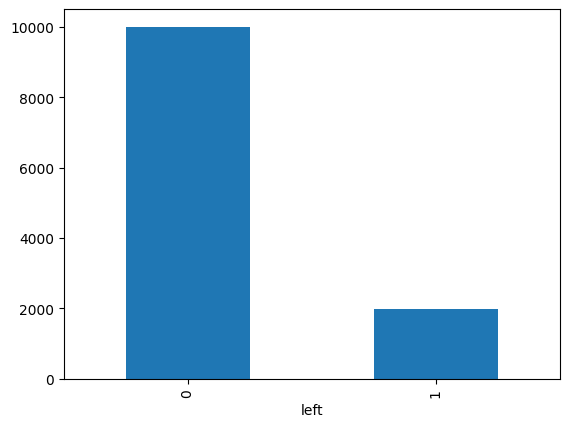

In [22]:
em_data1['left'].value_counts().plot(kind = 'bar')

Imbalance data

checking impact of salary on emp retention

In [24]:
pd.crosstab(em_data1.salary , em_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

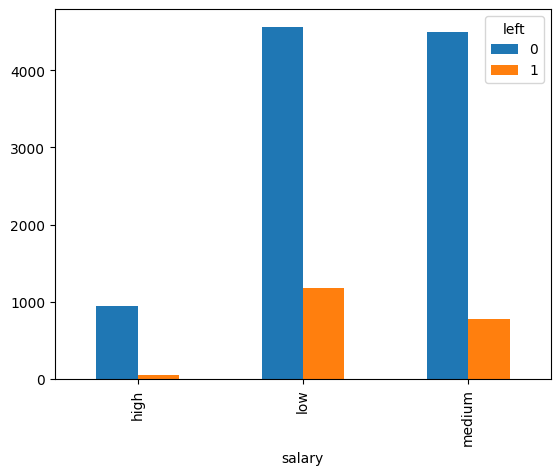

In [25]:
pd.crosstab(em_data1.salary , em_data1.left).plot(kind = 'bar')

Department wise emp retention

In [27]:
pd.crosstab(em_data1.Department, em_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


<Axes: xlabel='Department'>

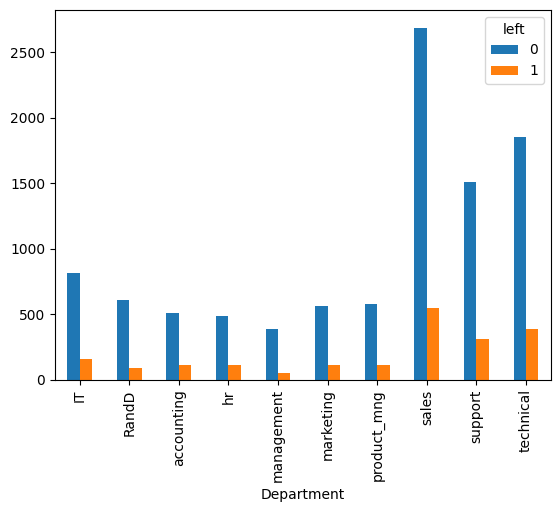

In [29]:
pd.crosstab(em_data1.Department, em_data1.left).plot(kind = 'bar')

Distribution for each Numerical features

In [30]:
num_fea_list1 = [f for f in em_data1.columns if em_data1.dtypes[f] == 'float64']

In [31]:
num_fea_list1

['satisfaction_level', 'last_evaluation']

In [32]:
num_fea_list2 = [f for f in em_data1.columns if em_data1.dtypes[f] == 'int64']

In [33]:
num_fea_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

##Checking if any outliers are present or not

In [58]:
num_col_list = num_fea_list1 + num_fea_list2

In [59]:
print(num_col_list)

['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'satisfaction_level', 'last_evaluation']


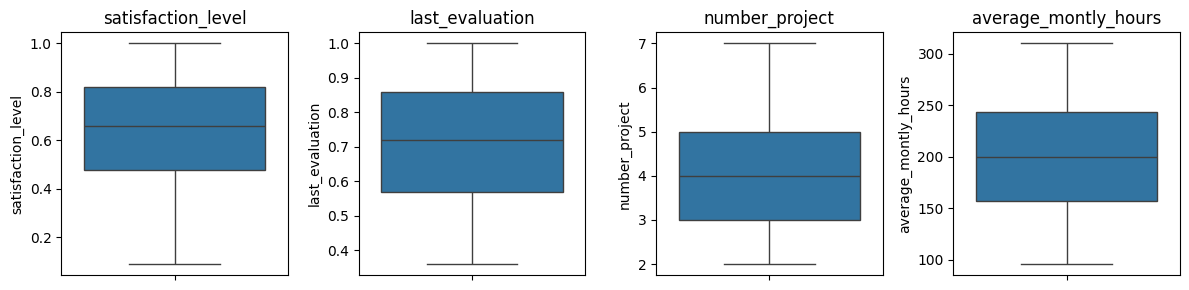

In [60]:
fig, axes = plt.subplots(ncols = 4,figsize = (12,3))
for column, axis in zip(num_col_list[:4],axes):
  sns.boxplot(data = em_data1[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

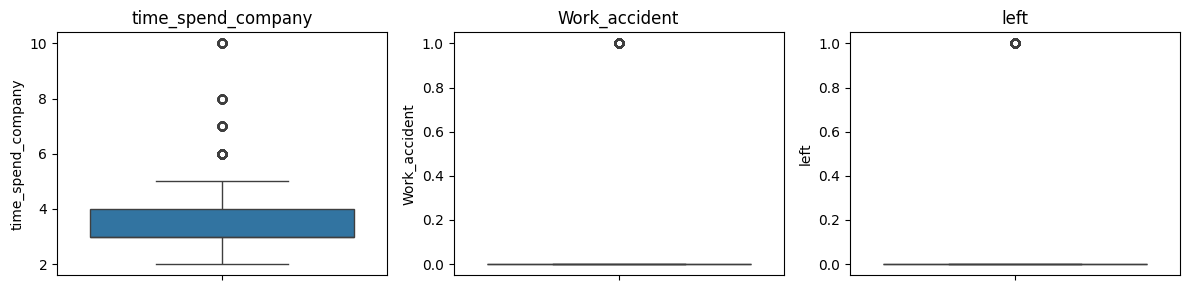

In [61]:
fig, axes = plt.subplots(ncols = 3,figsize = (12,3))
for column, axis in zip(num_col_list[4:],axes):
  sns.boxplot(data = em_data1[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

##Feature Engineering

Label Encoding: Converting Categorical Features to Numerical values

In [63]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [64]:
em_data1['salary'] = label_encoder.fit_transform(em_data1['salary'])
em_data1['Department'] = label_encoder.fit_transform(em_data1['Department'])

/tmp/ipython-input-1849313355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  em_data1['salary'] = label_encoder.fit_transform(em_data1['salary'])
/tmp/ipython-input-1849313355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  em_data1['Department'] = label_encoder.fit_transform(em_data1['Department'])


In [65]:
em_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [66]:
X = em_data1.drop('left', axis = 1)
y = em_data1['left']

In [69]:
from sklearn.model_selection import train_test_split
X_train,x_test , y_train, y_test = train_test_split(X, y,test_size = 0.2,random_state = 42 )

In [71]:
X_train.shape

(9592, 9)

In [70]:
from sklearn.preprocessing import StandardScaler
std_scaler  = StandardScaler()

In [73]:
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.fit_transform(x_test)

#Model Development

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
random_forest_model = RandomForestClassifier()

In [76]:
random_forest_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [77]:
y_pred = random_forest_model.predict(X_test_scaled)

#Model Evaluation

##Confusion Matrix

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1983   15]
 [  46  355]]


In [81]:
from sklearn.metrics import accuracy_score
model_accuracy  = accuracy_score(y_test, y_pred)
print(f"Model accuracy : {model_accuracy}")

Model accuracy : 0.9745727386411005


In [83]:
from sklearn.metrics import precision_score
model_precision  = precision_score(y_test, y_pred)
print(f"Model precision : {model_precision}")

Model precision : 0.9594594594594594


In [85]:
from sklearn.metrics import recall_score
model_recall  = recall_score(y_test, y_pred)
print(f"Model recall : {model_recall}")

Model recall : 0.885286783042394


In [86]:
from sklearn.metrics import f1_score
model_f1_score  = f1_score(y_test, y_pred)
print(f"Model f1_score : {model_f1_score}")

Model f1_score : 0.920881971465629


In [87]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1998
           1       0.96      0.89      0.92       401

    accuracy                           0.97      2399
   macro avg       0.97      0.94      0.95      2399
weighted avg       0.97      0.97      0.97      2399



##Feature Importance

In [88]:
score_list = random_forest_model.feature_importances_
list_of_features = list(X.columns)

In [89]:
score_df = pd.DataFrame({'Features' : list_of_features, 'Score' : score_list})
score_df.sort_values(by = 'Score', ascending = False)

,Features,Score
0,satisfaction_level,0.333470
2,number_project,0.191268
4,time_spend_company,0.164829
3,average_montly_hours,0.150420
1,last_evaluation,0.135869
7,Department,0.011923
8,salary,0.007031
5,Work_accident,0.004478
6,promotion_last_5years,0.000713


##k-fold cross validation

In [90]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_model , X_train_scaled , y_train,cv = 5, scoring = 'accuracy')
print('Cross Validation scores = ', scores)

Cross Validation scores =  [0.9885357  0.98332465 0.98488008 0.98488008 0.98696559]


In [91]:
avg_score = scores.mean()

In [92]:
print('Average Model score', avg_score)

Average Model score 0.9857172199849918


#Hyper Parameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV

In [95]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt' ,'log2', None]

}

## Searching best parameters

In [100]:
grid_search  = GridSearchCV(random_forest_model, param_grid= parameters)

In [103]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 100]})

In [104]:
grid_search.best_params_

{'max_features': 'sqrt', 'n_estimators': 50}

In [105]:
random_forest_new_model  = RandomForestClassifier(max_features= 'sqrt', n_estimators = 50)

In [106]:
random_forest_new_model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=50)

In [107]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(random_forest_model , X_train_scaled , y_train,cv = 5, scoring = 'accuracy')
print('Cross Validation scores = ', scores)

Cross Validation scores =  [0.9885357  0.98384575 0.98540146 0.98592284 0.98748697]


In [108]:
avg_score = scores.mean()
print('Average Model score', avg_score)

Average Model score 0.9862385420804305


In [110]:
import joblib


joblib.dump(random_forest_model, "emp_attrition_model.pkl")


['emp_attrition_model.pkl']